In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, classification_report
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [3]:
read_full = pd.read_excel("solar-potential.xlsx")
read_full = read_full[read_full.Generation <= 7000]
read_full = read_full.drop("OBJECTID", axis=1)

print(read_full.head())
print(read_full.count())


   Insolation     Area  Generation  CO2 Saving kg per year  \
0   1027.9546  34.6873   3209.1230               1742.5538   
1    973.5484  29.1889   2557.5083               1388.7271   
2   1007.9615  24.1928   2194.6885               1191.7158   
3    984.3519  55.2254   4892.5117               2656.6338   
4   1022.1143  32.5077   2990.3904               1623.7820   

   Solar PV Capacity kWp         Suitability  SHAPE.STArea()  \
0                 4.9553  excellent suitable        93.73000   
1                 4.1698       well suitable        69.91125   
2                 3.4561  excellent suitable        91.94250   
3                 7.8893       well suitable        79.90375   
4                 4.6440  excellent suitable        63.07750   

   SHAPE.STLength()                                          geo_shape  \
0         46.953521  {"coordinates":[[[-2.5874139063286563,51.47972...   
1         41.581571  {"coordinates":[[[-2.5901285140873544,51.47939...   
2         44.920766 

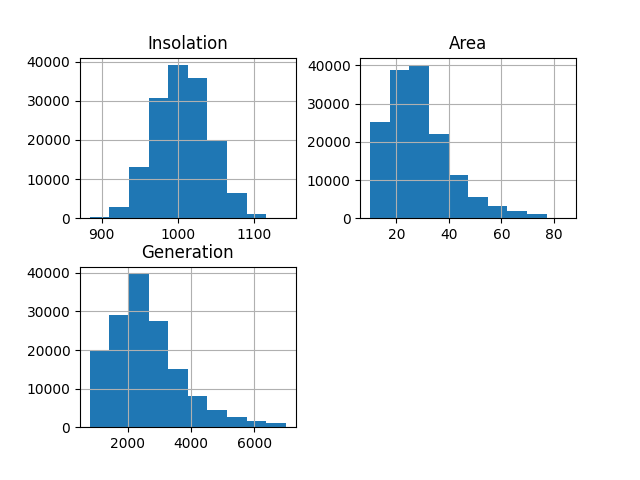

In [4]:
read_full.hist(column=["Insolation","Area","Generation"])
plt.show()

In [45]:
X = read_full[["Insolation", "Area"]].copy()
y = read_full["Suitability"].copy()
scaleX = StandardScaler().fit(X)
X = scaleX.transform(X)
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.19)



X_gen = read_full[["Insolation", "Area"]].copy()
y_gen = read_full["Generation"].copy()
# scaleX_gen = StandardScaler().fit(X_gen)
# X_gen = scaleX_gen.transform(X_gen)
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_gen,y_gen, test_size=0.19)



X_corr = read_full["geo_point_2d"].str.split(", ", expand = True)
X_corr = pd.concat([X_corr,read_full['Area'],read_full['Insolation']],axis=1)
X_corr = X_corr.rename(columns={0:"Y",1:"X"})
print(X_corr)
y_corr = read_full["Generation"]/read_full["Area"]
scaleX_corr = StandardScaler().fit(X_corr)
X_corr = scaleX_corr.transform(X_corr)
X_corr_train, X_corr_test, y_corr_train, y_corr_test = train_test_split(X_corr,y_corr, test_size=0.19)



                         Y                    X     Area  Insolation
0       51.479789394915414  -2.5873612480211072  34.6873   1027.9546
1        51.47943580731375  -2.5902427777710884  29.1889    973.5484
2        51.48096825418921   -2.588538353721102  24.1928   1007.9615
3       51.479505984165904   -2.588481244956915  55.2254    984.3519
4         51.4799082620456   -2.586075884271848  32.5077   1022.1143
...                    ...                  ...      ...         ...
158143   51.48596806745893  -2.6134686522721027  44.5005   1015.2800
158144   51.48641140220748  -2.6081751638178625  43.3017   1013.8500
158145   51.48588361966243   -2.611055941491508  26.5584   1005.6539
158146  51.486208218743656  -2.6116739193773073  32.9954   1001.0270
158147  51.486524801230416  -2.6063219578587495  10.2637    954.4167

[149481 rows x 4 columns]


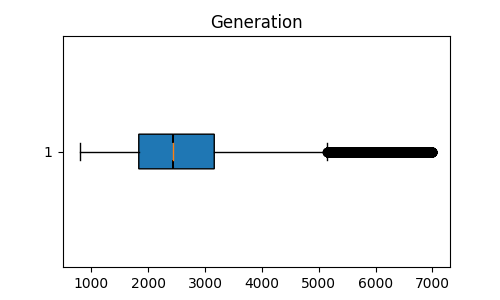

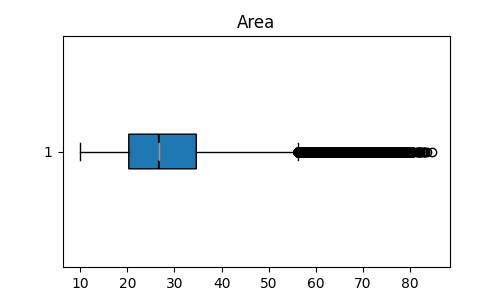

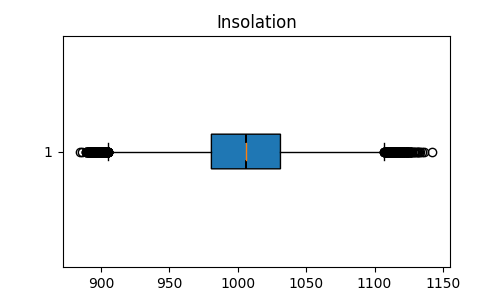

In [6]:
fig1 = plt.figure(figsize =(5, 3))
fig2 = plt.figure(figsize =(5, 3))
fig3 = plt.figure(figsize =(5, 3))
 
# Creating plot
ax1 = fig1.add_subplot()
ax2 = fig2.add_subplot()
ax3 = fig3.add_subplot()

bp1 = ax1.boxplot(read_full["Area"], patch_artist = True, notch = 'True', vert = 0, )
bp2 = ax2.boxplot(read_full["Insolation"], patch_artist = True, notch = 'True', vert = 0)
bp3 = ax3.boxplot(read_full["Generation"], patch_artist = True, notch = 'True', vert = 0)

ax1.title.set_text('Area') 
ax2.title.set_text('Insolation') 
ax3.title.set_text('Generation') 
# show plot
plt.show()

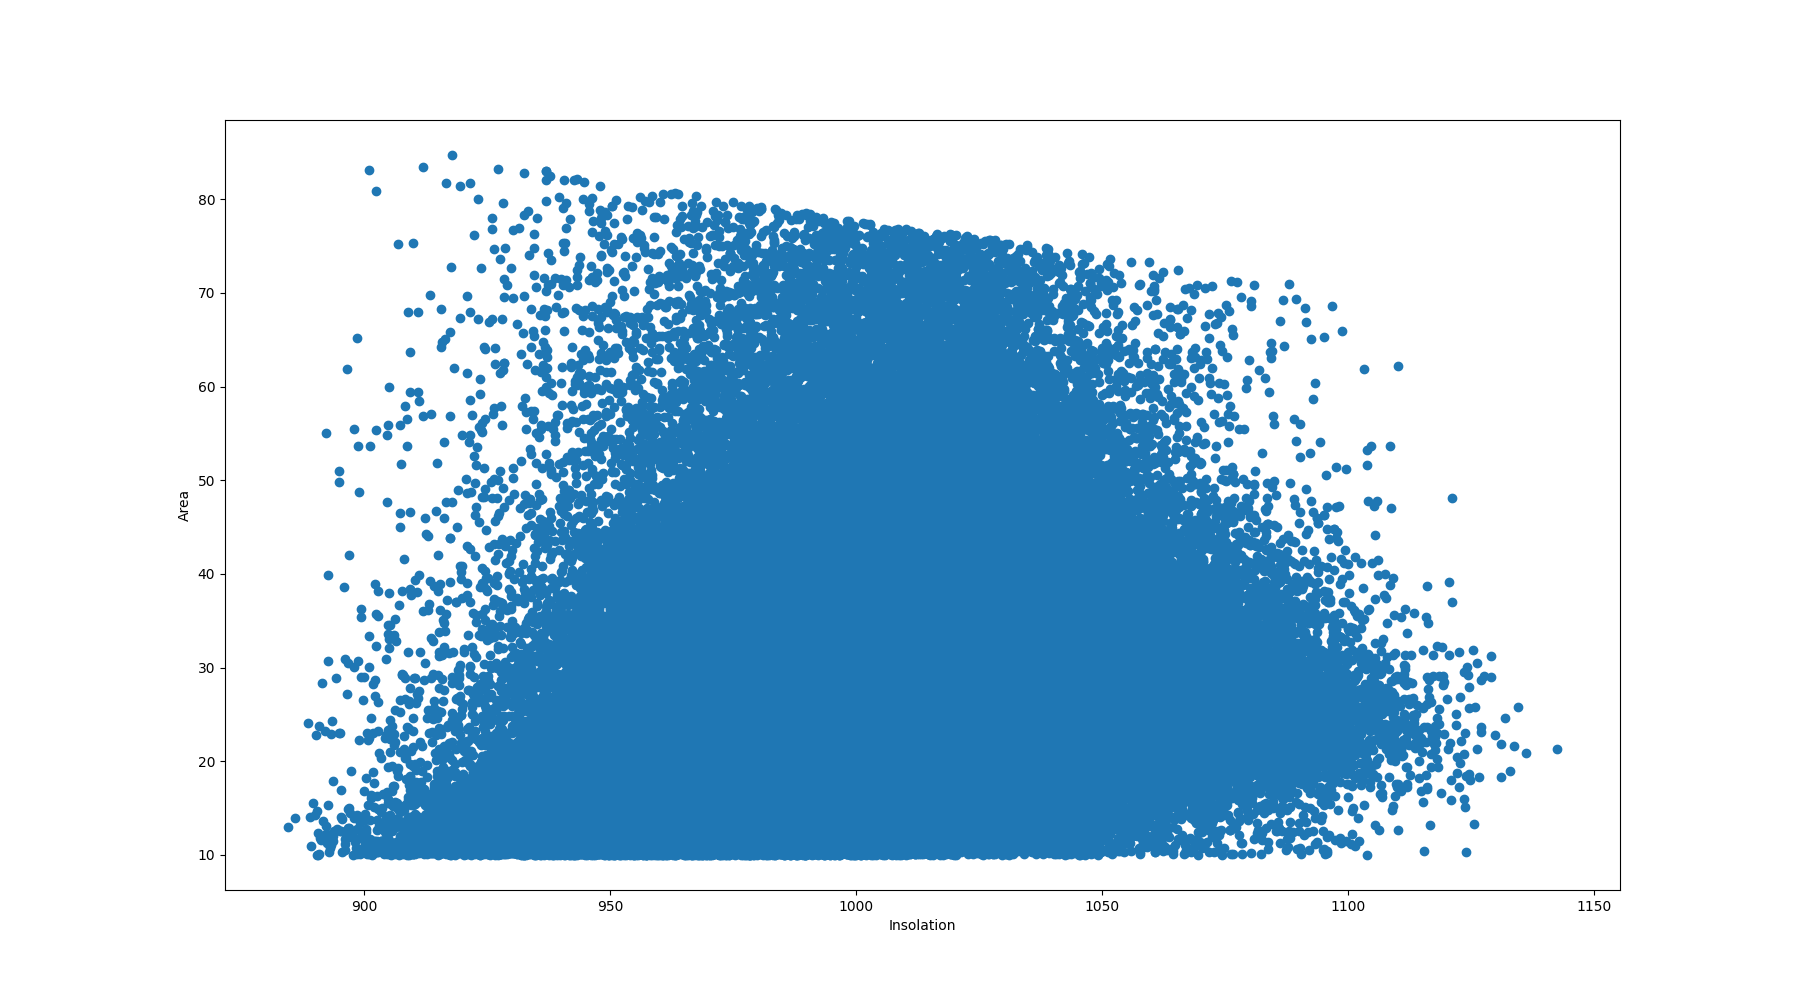

In [7]:
fig, ax = plt.subplots(figsize = (18,10))

ax.scatter(read_full["Insolation"], read_full["Area"])
plt.xlabel("Insolation")
plt.ylabel("Area")

plt.show()

Accuracy Score of Random Forest Classifier: 100.0%
                    precision    recall  f1-score   support

          suitable       1.00      1.00      1.00     15949
     well suitable       1.00      1.00      1.00       842
excellent suitable       1.00      1.00      1.00     11611

          accuracy                           1.00     28402
         macro avg       1.00      1.00      1.00     28402
      weighted avg       1.00      1.00      1.00     28402



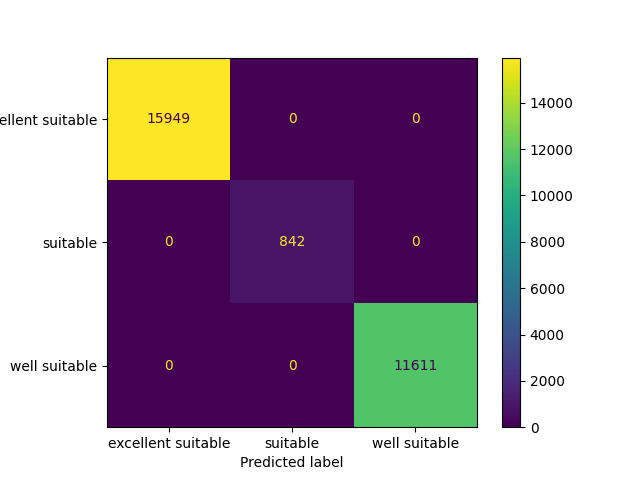

In [8]:
rfc = RandomForestClassifier(n_estimators=50, max_features="sqrt", max_samples=None)

# Fit RFC and predict using the testing set
rfc.fit(train_x, train_y)
pred2 = rfc.predict(test_x)

# Performance Report of rfc
print(f"Accuracy Score of Random Forest Classifier: {accuracy_score(pred2,test_y)*100}%")
cm = confusion_matrix(test_y, pred2, labels = rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# rfc_disp = RocCurveDisplay.from_estimator(rfc, test_x, test_y, ax=ax1)
# prec, recall, _ = precision_recall_curve(test_y, pred2, pos_label=rfc.classes_[1])
# pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

print(classification_report(test_y, pred2, target_names=["suitable", "well suitable", "excellent suitable"]))

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logmodel = LinearRegression()

pipe = make_pipeline(StandardScaler(), logmodel)
pipe.fit(X_gen_train,y_gen_train)  # apply the pipeline on training data
print(pipe.score(X_gen_test,y_gen_test))

0.9989696878861959


Insolation max:1142.3/min: 884.6154
Area max:84.7107/min: 10.0
Generation max:6999.2334/min: 801.36


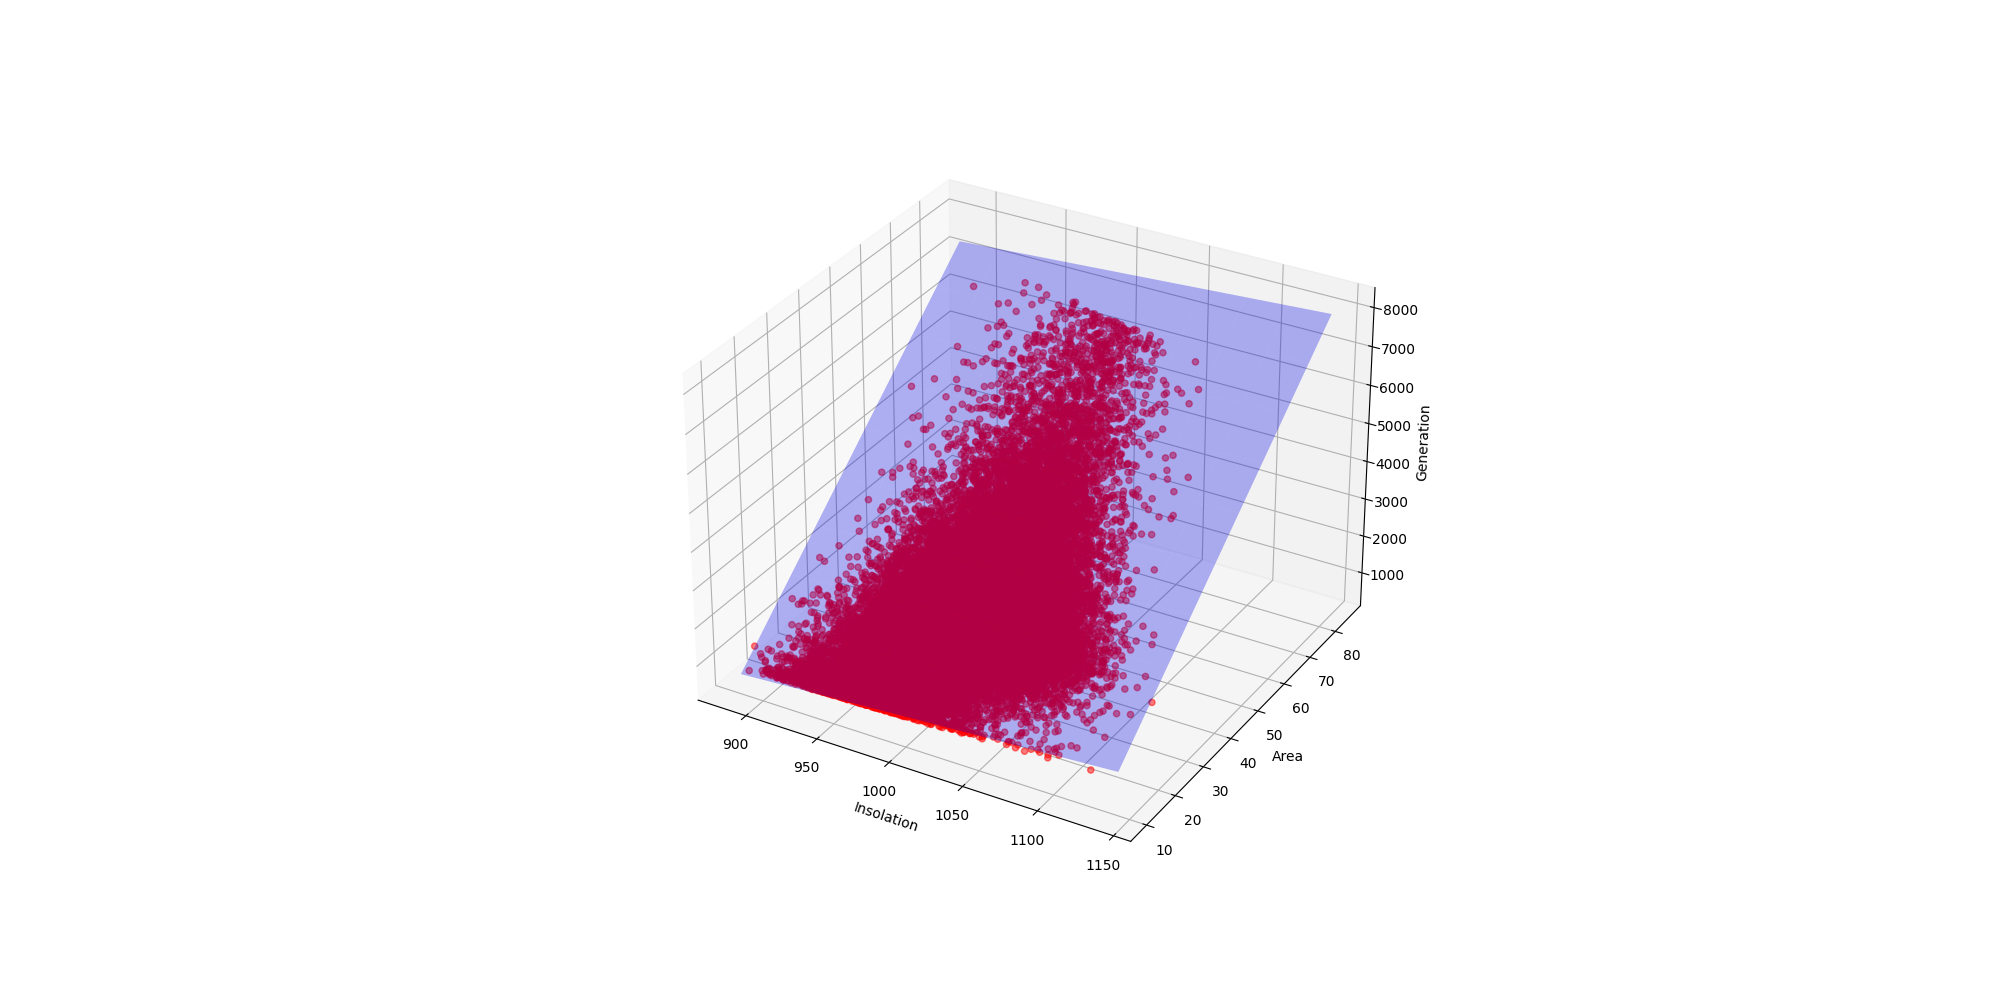

In [12]:
x_surf, y_surf = np.meshgrid(np.linspace(read_full.Insolation.min(), read_full.Insolation.max(), 10), np.linspace(read_full.Area.min(), read_full.Area.max(), 10))
onlyX = pd.DataFrame({'Insolation':x_surf.ravel(), 'Area':y_surf.ravel()})
fittedY=pipe.predict(onlyX)
fittedY=np.array(fittedY)

print(f"Insolation max:{read_full.Insolation.max()}/min: {read_full.Insolation.min()}")
print(f"Area max:{read_full.Area.max()}/min: {read_full.Area.min()}")
print(f"Generation max:{read_full.Generation.max()}/min: {read_full.Generation.min()}")

# readfile["Generation"].plot.line()

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_gen_test['Insolation'],X_gen_test['Area'],y_gen_test,c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Insolation')
ax.set_ylabel('Area')
ax.set_zlabel('Generation')
plt.show()

In [44]:
logmodel = LinearRegression()

pipe = make_pipeline(StandardScaler(), logmodel)
pipe.fit(X_corr_train,y_corr_train)  # apply the pipeline on training data
print(pipe.score(X_corr_test,y_corr_test))

0.9999999986769825
